In [1]:
!pip install pandas numpy matplotlib scikit-learn xgboost seaborn imbalanced-learn openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading CSV File

In [3]:
df = pd.read_csv('Teacher Assistance2.csv')
print(df.head())

   Native_Teacher  Instructor  Course  Semester  Class_Size  Class_Attribute
0               1          23       3         1          19                3
1               2          15       3         1          17                3
2               1          23       3         2          49                3
3               1           5       2         2          33                3
4               2           7      11         2          55                3


In [ ]:
# Cheacking Basic structure

In [4]:
df.describe()

,Native_Teacher,Instructor,Course,Semester,Class_Size,Class_Attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [9]:
# Check the basic structure

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Native_Teacher   151 non-null    int64
 1   Instructor       151 non-null    int64
 2   Course           151 non-null    int64
 3   Semester         151 non-null    int64
 4   Class_Size       151 non-null    int64
 5   Class_Attribute  151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB
None


In [5]:
# Check for missing values

In [6]:
print(df.isnull().sum())

Native_Teacher     0
Instructor         0
Course             0
Semester           0
Class_Size         0
Class_Attribute    0
dtype: int64


In [7]:
# Check unique values for each column

In [7]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Native_Teacher: 2 unique values
Instructor: 25 unique values
Course: 26 unique values
Semester: 2 unique values
Class_Size: 46 unique values
Class_Attribute: 3 unique values


In [13]:
# Set a style for all plots

In [8]:
sns.set(style="whitegrid")

In [15]:
# Check class distribution

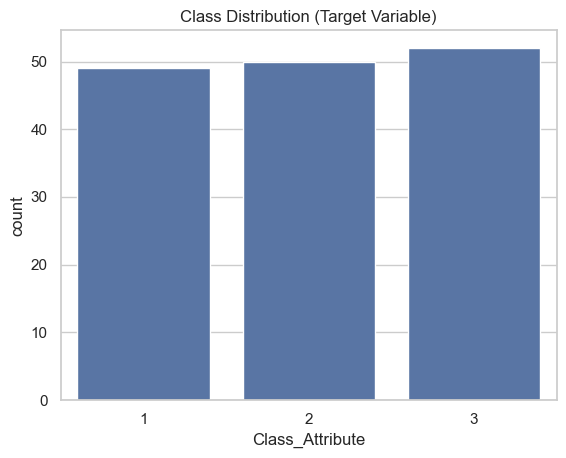

In [9]:
sns.countplot(x='Class_Attribute', data=df)
plt.title("Class Distribution (Target Variable)")
plt.show()

In [18]:
# Visualize class size distribution

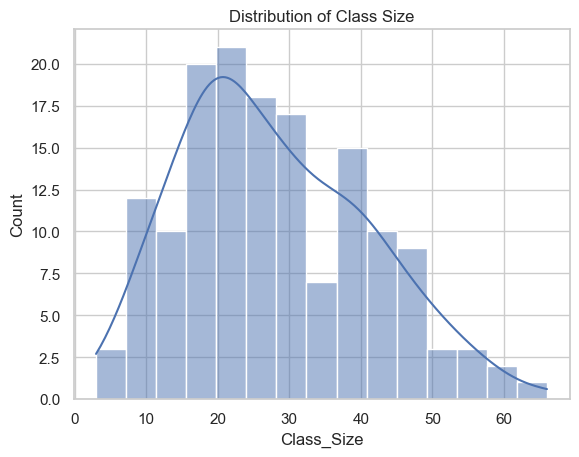

In [10]:
sns.histplot(df['Class_Size'], bins=15, kde=True)
plt.title("Distribution of Class Size")
plt.show()

In [23]:
# Compare native teachers vs performance

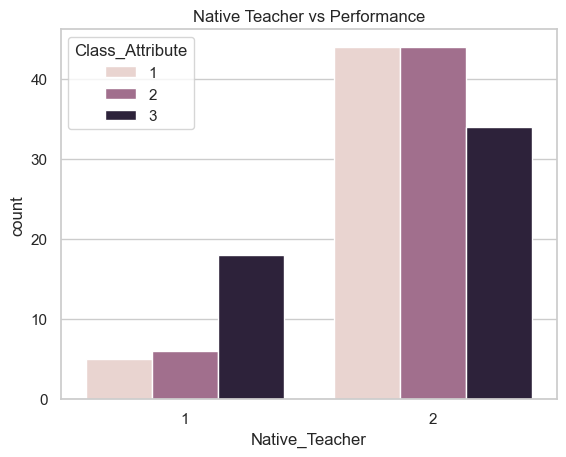

In [11]:
sns.countplot(x='Native_Teacher', hue='Class_Attribute', data=df)
plt.title("Native Teacher vs Performance")
plt.show()

In [26]:
# Compare semester type vs performance

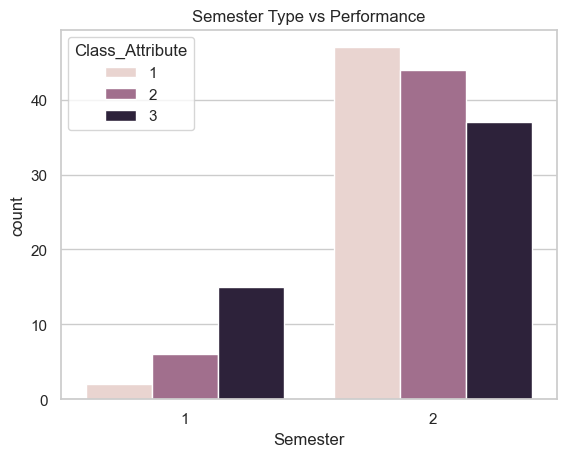

In [12]:
sns.countplot(x='Semester', hue='Class_Attribute', data=df)
plt.title("Semester Type vs Performance")
plt.show()

Prepare Data for Machine Learning

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [30]:
# Make a copy to avoid messing with the original

In [15]:
data = df.copy()
print (data)

     Native_Teacher  Instructor  Course  Semester  Class_Size  Class_Attribute
0                 1          23       3         1          19                3
1                 2          15       3         1          17                3
2                 1          23       3         2          49                3
3                 1           5       2         2          33                3
4                 2           7      11         2          55                3
..              ...         ...     ...       ...         ...              ...
146               2           3       2         2          26                1
147               2          10       3         2          12                1
148               1          18       7         2          48                1
149               2          22       1         2          51                1
150               2           2      10         2          27                1

[151 rows x 6 columns]


In [33]:
# Encode categorical columns (Instructor, Course, etc.)

In [16]:
le = LabelEncoder()
for col in ['Instructor', 'Course', 'Native_Teacher', 'Semester']:
    data[col] = le.fit_transform(data[col])

In [35]:
# Split into features (X) and target (y)

In [17]:
X = data.drop('Class_Attribute', axis=1)
y = data['Class_Attribute']-1

In [37]:
# Split train/test data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build and Compare Simple Models

In [19]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [20]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}
predictions = {}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    predictions[name] = preds  # store predictions for later use
    
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, preds))



Decision Tree Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.64      0.64      0.64        11
           2       0.62      0.56      0.59         9

    accuracy                           0.68        31
   macro avg       0.67      0.67      0.67        31
weighted avg       0.67      0.68      0.67        31


Random Forest Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.78      0.64      0.70        11
           2       0.62      0.56      0.59         9

    accuracy                           0.71        31
   macro avg       0.71      0.70      0.70        31
weighted avg       0.71      0.71      0.70        31



C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:199: UserWarning: [17:32:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.80      0.73      0.76        11
           2       0.71      0.56      0.62         9

    accuracy                           0.71        31
   macro avg       0.72      0.70      0.70        31
weighted avg       0.72      0.71      0.71        31


Logistic Regression Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.50      0.45      0.48        11
           2       0.83      0.56      0.67         9

    accuracy                           0.58        31
   macro avg       0.62      0.58      0.59        31
weighted avg       0.61      0.58      0.58        31



Compare Model Accuracies

In [44]:
# Plot model accuracies

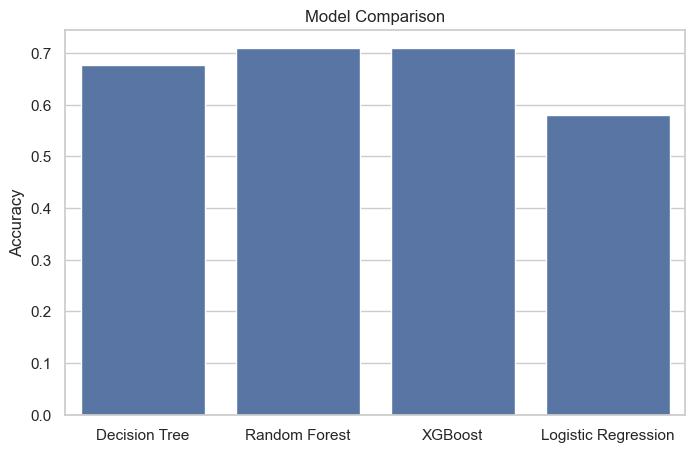

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.show()

In [1]:
# Create dataframe with predictions

In [28]:
test_df = X_test.copy()
test_df['True_Label'] = y_test.values
test_df['Pred_DecisionTree'] = predictions["Decision Tree"]
test_df['Pred_RandomForest'] = predictions["Random Forest"]
test_df['Pred_XGBoost'] = predictions["XGBoost"]
test_df['Pred_LogReg'] = predictions["Logistic Regression"]

In [29]:
# Save to CSV

In [36]:
test_df.to_csv('TA_test_with_preds.csv', index=False)
print("Exported: TA_test_with_preds.csv")

Exported: TA_test_with_preds.csv


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

summary = []
for name, preds in predictions.items():
    acc = accuracy_score(y_test, preds)
    p = precision_score(y_test, preds, average='macro', zero_division=0)
    r = recall_score(y_test, preds, average='macro', zero_division=0)
    f1 = f1_score(y_test, preds, average='macro', zero_division=0)
    summary.append({
        'Model': name,
        'Accuracy': acc,
        'Precision_macro': p,
        'Recall_macro': r,
        'F1_macro': f1
    })

summary_df = pd.DataFrame(summary)
summary_df.to_csv('model_summary.csv', index=False)
print("Exported: model_summary.csv")
summary_df

Exported: model_summary.csv


,Model,Accuracy,Precision_macro,Recall_macro,F1_macro
0,Decision Tree,0.677419,0.670455,0.670034,0.669069
1,Random Forest,0.709677,0.705688,0.700337,0.696078
2,XGBoost,0.709677,0.719048,0.700337,0.702302
3,Logistic Regression,0.580645,0.622222,0.579125,0.586081


In [22]:
rf = models["Random Forest"]
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_df.to_csv('feature_importances_rf.csv', index=False)
print("Exported: feature_importances_rf.csv")
feature_importance_df.head(10)

Exported: feature_importances_rf.csv


,Feature,Importance
4,Class_Size,0.385512
2,Course,0.259496
1,Instructor,0.233430
0,Native_Teacher,0.072485
3,Semester,0.049077
